In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000, size=1550)
lngs = np.random.uniform(low=-180.000,high=180.000, size=1550)
lat_lngs = zip(lats,lngs)
lat_lngs

In [59]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]

# let us zip x and y coordinates together to form a tuple
coordinates = zip(x, y)

In [60]:
type(coordinates)

zip

In [61]:
coordinates

In [62]:
len(coordinates)

TypeError: object of type 'zip' has no len()

In [63]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [83]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [84]:
type(coordinates)

list

In [85]:
# import citiPy module
from citipy import citipy

In [86]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [87]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [88]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [89]:
# Create an empty list to hold the weather data.
city_data = []
# print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------------")

# create counters
record_count = 1
set_count = 1

# Loop Through the List of Cities and Build the City URL
# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if( i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set{set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

 # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set1 | lagoa
Processing Record 2 of Set1 | hermanus
Processing Record 3 of Set1 | kuching
Processing Record 4 of Set1 | balakhninskiy
Processing Record 5 of Set1 | albany
Processing Record 6 of Set1 | port lincoln
Processing Record 7 of Set1 | hilo
Processing Record 8 of Set1 | rong kwang
Processing Record 9 of Set1 | ajdabiya
Processing Record 10 of Set1 | jamestown
Processing Record 11 of Set1 | turki
Processing Record 12 of Set1 | touros
Processing Record 13 of Set1 | tiksi
Processing Record 14 of Set1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set1 | yumen
Processing Record 16 of Set1 | longhua
Processing Record 17 of Set1 | bluff
Processing Record 18 of Set1 | prince rupert
Processing Record 19 of Set1 | hobart
Processing Record 20 of Set1 | kavieng
Processing Record 21 of Set1 | caravelas
Processing Record 22 of Set1 | butaritari
Processing Record 23 of Set1 | montevideo
Proces

Processing Record 43 of Set4 | morondava
Processing Record 44 of Set4 | tuatapere
Processing Record 45 of Set4 | chapais
Processing Record 46 of Set4 | irkutsk
Processing Record 47 of Set4 | minab
Processing Record 48 of Set4 | puerto ayora
Processing Record 49 of Set4 | mangaratiba
Processing Record 50 of Set4 | baruun-urt
Processing Record 1 of Set5 | andenes
Processing Record 2 of Set5 | ferkessedougou
Processing Record 3 of Set5 | bababe
City not found. Skipping...
Processing Record 4 of Set5 | norman wells
Processing Record 5 of Set5 | soyo
Processing Record 6 of Set5 | barrow
Processing Record 7 of Set5 | galle
Processing Record 8 of Set5 | makakilo city
Processing Record 9 of Set5 | crowley
Processing Record 10 of Set5 | alofi
Processing Record 11 of Set5 | aswan
Processing Record 12 of Set5 | hualmay
Processing Record 13 of Set5 | calbuco
Processing Record 14 of Set5 | muroto
Processing Record 15 of Set5 | kurilsk
Processing Record 16 of Set5 | ancud
Processing Record 17 of Set

Processing Record 36 of Set8 | anori
Processing Record 37 of Set8 | ocampo
Processing Record 38 of Set8 | seoul
Processing Record 39 of Set8 | saurimo
Processing Record 40 of Set8 | sao filipe
Processing Record 41 of Set8 | vorukh
Processing Record 42 of Set8 | saint anthony
Processing Record 43 of Set8 | cravo norte
Processing Record 44 of Set8 | vestmannaeyjar
Processing Record 45 of Set8 | san policarpo
Processing Record 46 of Set8 | vostok
Processing Record 47 of Set8 | suriapet
Processing Record 48 of Set8 | margate
Processing Record 49 of Set8 | coquimbo
Processing Record 50 of Set8 | jiujiang
Processing Record 1 of Set9 | alice springs
Processing Record 2 of Set9 | teknaf
Processing Record 3 of Set9 | zlobin
Processing Record 4 of Set9 | edmundston
Processing Record 5 of Set9 | gimli
Processing Record 6 of Set9 | taoudenni
Processing Record 7 of Set9 | abbotsford
Processing Record 8 of Set9 | sopur
Processing Record 9 of Set9 | fairlie
Processing Record 10 of Set9 | aybak
City n

Processing Record 24 of Set12 | marsh harbour
Processing Record 25 of Set12 | afmadu
City not found. Skipping...
Processing Record 26 of Set12 | ouesso
Processing Record 27 of Set12 | beloha
Processing Record 28 of Set12 | tamandare
Processing Record 29 of Set12 | tadine
Processing Record 30 of Set12 | devonport
Processing Record 31 of Set12 | poum
Processing Record 32 of Set12 | thinadhoo
Processing Record 33 of Set12 | palana
Processing Record 34 of Set12 | tessalit
Processing Record 35 of Set12 | porangatu
Processing Record 36 of Set12 | khonuu
City not found. Skipping...
Processing Record 37 of Set12 | thaton
Processing Record 38 of Set12 | senneterre
Processing Record 39 of Set12 | buraydah
Processing Record 40 of Set12 | kota tinggi
Processing Record 41 of Set12 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set12 | mangrol
Processing Record 43 of Set12 | karauzyak
City not found. Skipping...
Processing Record 44 of Set12 | xining
Processing Record 45 of Set12

In [90]:
len(city_data)

578

In [91]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.0500,-27.9833,63.45,77,72,34.14,PT,2021-11-24 21:16:49
1,Hermanus,-34.4187,19.2345,60.80,74,0,20.92,ZA,2021-11-24 21:16:13
2,Kuching,1.5500,110.3333,77.22,94,40,0.00,MY,2021-11-24 21:16:50
3,Balakhninskiy,58.0106,114.2769,-8.37,88,99,2.68,RU,2021-11-24 21:16:50
4,Albany,42.6001,-73.9662,40.32,54,3,3.51,US,2021-11-24 21:14:51
5,Port Lincoln,-34.7333,135.8667,60.31,82,11,20.56,AU,2021-11-24 21:16:51
6,Hilo,19.7297,-155.0900,80.62,69,20,5.75,US,2021-11-24 21:16:00
7,Rong Kwang,18.3390,100.3174,67.55,96,66,1.90,TH,2021-11-24 21:16:51
8,Ajdabiya,30.7554,20.2263,68.95,55,53,3.85,LY,2021-11-24 21:16:52
9,Jamestown,42.0970,-79.2353,44.19,54,1,5.99,US,2021-11-24 21:16:52


In [92]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [94]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [95]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#### Latitude vs. Max. Temperature

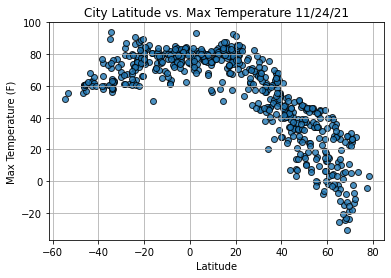

In [96]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

####  Plot Latitude vs. Humidity

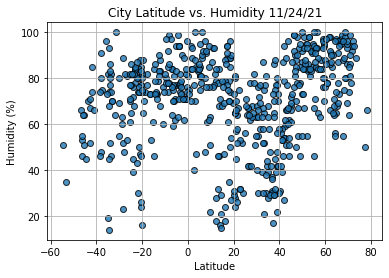

In [100]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

####  Plot Latitude vs. Cloudiness

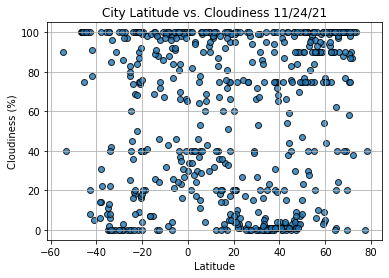

In [101]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

#### Plot Latitude vs. Wind Speed

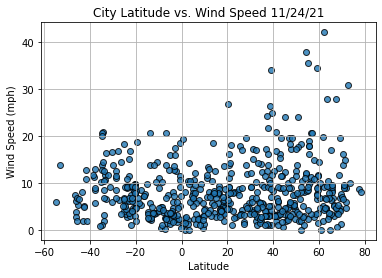

In [102]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

#### Use Linear Regression to Find the Relationship Between Variables

#### Create a Linear Regression Function

In [104]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [105]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

#### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

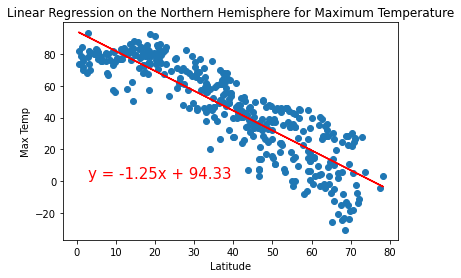

In [118]:
# Linear regression on the Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_axis,y_axis,'Linear Regression on the Northern Hemisphere \
for Maximum Temperature','Max Temp', (3,2))
                       

#### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

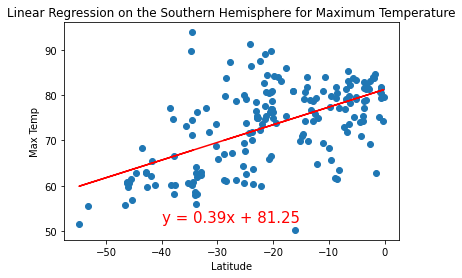

In [127]:
# Linear regression on the Northern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_axis,y_axis,'Linear Regression on the Southern Hemisphere \
for Maximum Temperature','Max Temp', (-40,52))
                       

#### Find the Correlation Between Latitude and Percent Humidity

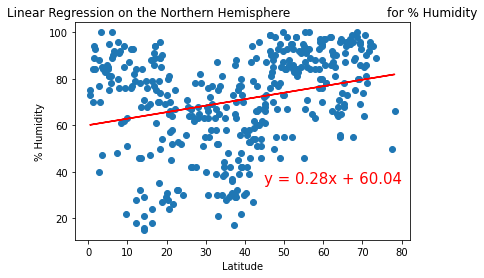

In [138]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,35))

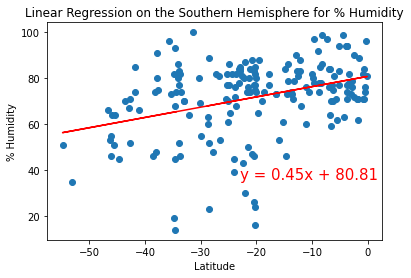

In [158]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-23,36))

#### Find the Correlation Between Latitude and Percent Cloudiness

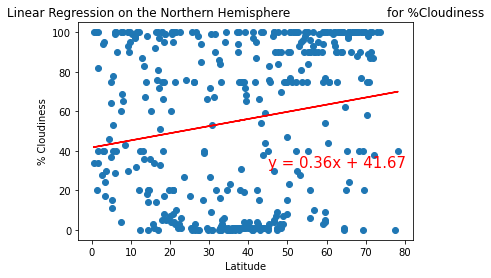

In [162]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %Cloudiness', '% Cloudiness',(45,32))

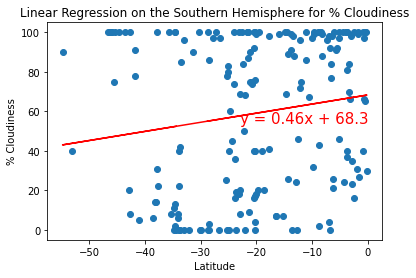

In [166]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-23,54))

#### 6.4.5 Find the Correlation Between Latitude and Wind Speed

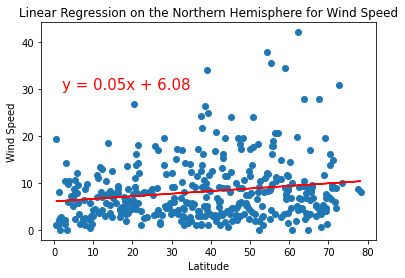

In [197]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(2,30))

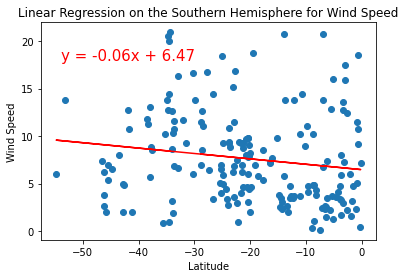

In [194]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-54,18))